- DATA471 - Assginment 4
- Name: Heba Aleterji

# Part 1:  EDA

### Import Library 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### Reading dataset

Load two dataset CSV files into pandas DataFrames:
- (train-1.csv) for training and exvaluation the model 
- (test-1.csv) for testing model geeralization on unseen dta  

In [59]:
# Load the dataset
train_data = pd.read_csv('train-1.csv')
test_data = pd.read_csv('test-1.csv')

In [ ]:
# View the first few rows of the training data
# print(train_data.head())

## Data Understanding: 

#### **Data Type Summary**

In [79]:
# Check the info and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          6117 non-null   object 
 1   year_of_observation  6117 non-null   int64  
 2   insured_period       6117 non-null   float64
 3   residential          6117 non-null   int64  
 4   building_painted     6117 non-null   object 
 5   building_fenced      6117 non-null   object 
 6   garden               6117 non-null   object 
 7   settlement           6117 non-null   object 
 8   building_dimension   6117 non-null   float64
 9   building_type        6117 non-null   int64  
 10  date_of_occupancy    6117 non-null   float64
 11  number_of_windows    6117 non-null   float64
 12  geo_code             6117 non-null   object 
 13  claim                6117 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 669.2+ KB


- **Dataset contain 13 variables,** 7 continuios variables and 6 categorical variables.
- **Categorical Columns are:** customer_id, building_painted, building_fenced, garden, settlement, number_of_windows
- **Numerical Columns:** year_of_observation, insured_period, residential, building_dimension, building_type, date_of_occupancy, claim.

- **The dataset variables have the following meaning:**
    1. **customer_id (object):** This column contains customer identifiers, which are stored as strings (object in pandas).
    
    2. **year_of_observation (int64):** This column stores the year when the observation was made as integers (int64).
    3. **insured_period (float64):** This column represents the duration the building has been insured, stored as floating-point numbers (float64).
    4. **residential (int64):** This integer column likely indicates a binary or categorical value (e.g., 1 for residential, 0 for non-residential) but is stored as numeric data.
    5. **building_painted (object):** This column contains categorical data that likely indicates whether the building is painted (e.g., 'Yes' or 'No').
    6. **building_fenced (object):** Similar to building_painted, this column holds categorical data (e.g., 'Yes' or 'No') indicating if the building is fenced, stored as strings (object).
    7. garden (object): This categorical column indicates the presence of a garden (e.g., 'Yes' or 'No'), stored as strings (object)
    8. **settlement (object):** This column stores categorical data related to the settlement type (e.g., 'Urban' or 'Rural').
    9. **building_dimension (float64):** This column represents the dimensions of the building, stored as floating-point numbers (float64).
    10. **building_type (int64):** This column stores categorical information about the type of building as integers (int64).
    11. **date_of_occupancy (float64):** *This column records the date of occupancy, stored as a floating-point number (float64), possibly indicating a timestamp or year.*
    12. **number_of_windows (object):** *Even though it refers to a numeric feature (number of windows), it is stored as strings (object), indicating either non-standard values (e.g., 'Unknown') or categorical data.*
    13. **geo_code (object):** *This column holds geographic identifiers or codes, stored as strings (object), likely representing different regions or areas.*
    14. **claim (int64):** Target varaible. it is integer column represents either No claim (0) or at least one claim over insured (1).
    

#### **Unique Value:**

- *Check unique value for each variable*

In [80]:
# Assuming train_data is a pandas DataFrame
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-" * 40)

Column: customer_id
Unique Values: ['H14663' 'H2037' 'H3802' ... 'H5926' 'H6537' 'H7470']
----------------------------------------
Column: year_of_observation
Unique Values: [2013 2015 2014 2012]
----------------------------------------
Column: insured_period
Unique Values: [1.         0.24109589 0.84383562 0.08493151 0.85753425 0.29589041
 0.         0.91506849 0.98630137 0.16164384 0.99726027 0.09589041
 0.66575343 0.89315069 0.58082192 0.83287671 0.26027397 0.7479452
 0.41803279 0.10410959 0.76986301 0.02465753 0.47671233 0.86575342
 0.55464481 0.44808743 0.50273224 0.46849315 0.79726027 0.31506849
 0.59452055 0.74863388 0.17534247 0.11780822 0.12054795 0.49589041
 0.91530055 0.48087432 0.78082192 0.02191781 0.24863388 0.69589041
 0.94794521 0.50410959 0.82739726 0.52054795 0.58196721 0.16393443
 0.86885246 0.83606557 0.98356164 0.24657534 0.79178082 0.19452055
 0.41643836 0.95342466 0.41369863 0.25205479 0.80273973 0.38356164
 0.96721311 0.91780822 0.25136612 0.15068493 0.48493151 

#### **Descriptive Statistics Summary**

- Ckech distribution of numerical variables.

In [8]:
# Summary statistics for numerical columns
train_data.describe()

,year_of_observation,insured_period,residential,building_dimension,building_type,date_of_occupancy,claim
count,6117.000000,6117.000000,6117.000000,6015.000000,6117.000000,5658.000000,6117.000000
mean,2013.272192,0.906808,0.309956,1879.536326,2.190289,1964.894662,0.231976
std,1.075760,0.243628,0.462513,2268.133418,0.938294,35.118585,0.422129
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,1.000000,0.000000,520.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1084.000000,2.000000,1970.000000,0.000000
75%,2014.000000,1.000000,1.000000,2288.500000,3.000000,1980.000000,0.000000
max,2015.000000,1.000000,1.000000,20940.000000,4.000000,2015.000000,1.000000


- Insights from the descriptive statistics: 

    - **Year of Observation:** *The dataset includes data collected between 2012 and 2015*

    - **Insured Period:** *The insured period has a mean of 0.91, with a minimum of 0 and a maximum of 1.*
    - **Building Dimension:** The building dimensions show a wide range, with a minimum value of 1 and a maximum value of 20,940.
    - **Building Type:** The building type ranges from 1 to 4.
    - **Date of Occupancy:** The mean year of occupancy is around 1964.

#### **Target Class Distribution**

- Check imbalabnce in dataset, by count the number of samples for each target class

{0 : 4698}
{1 : 1419}


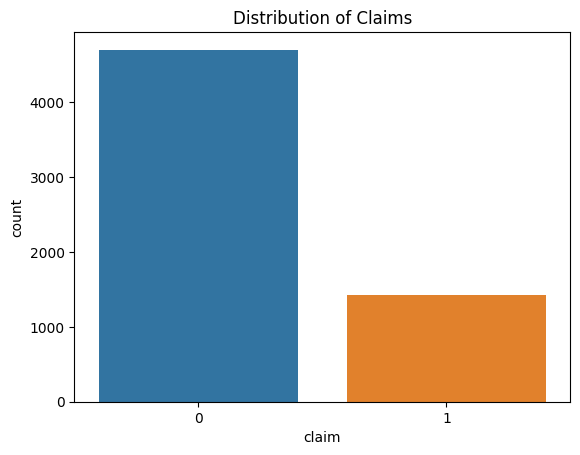

In [81]:
import numpy as np

for c in np.unique(train_data['claim']):
    print('{%d : %d}' % (c, sum(train_data['claim']==c)))

# Plot the distribution of the target variable
sns.countplot(x='claim', data=train_data)
plt.title('Distribution of Claims')
plt.show()

- As you can see in the result, there 4698 with class 0. while class 1 account 1419 instances.
- Thus, the dataset has imbalance issue.

#### **Missing Value:** 

- Check missing for each variables.
- Plot misssing Value for each variable

customer_id            0
year_of_observation    0
insured_period         0
residential            0
building_painted       0
building_fenced        0
garden                 0
settlement             0
building_dimension     0
building_type          0
date_of_occupancy      0
number_of_windows      0
geo_code               0
claim                  0
dtype: int64


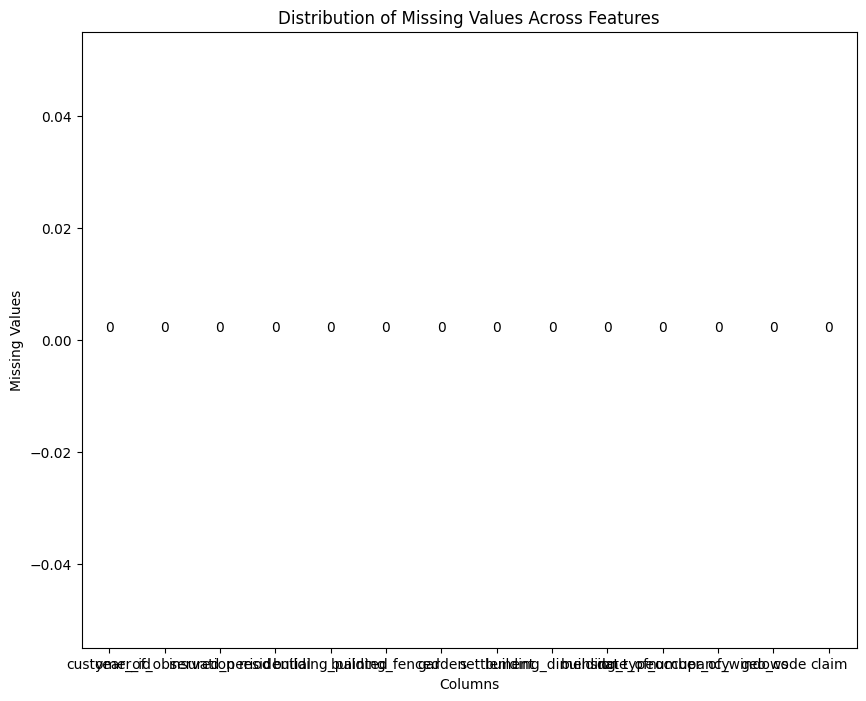

In [68]:
# Check for missing values in each column
print(train_data.isnull().sum())

# Check for missing values
missing_values = train_data.isnull().sum()

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Columns': missing_values.index,
    'Missing Values': missing_values.values
})

# Plot the missing values
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Columns', y='Missing Values', data=missing_df)
plt.title('Distribution of Missing Values Across Features')
# Annotate each bar with the count of missing values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')
plt.show()

- **As the information above, found missing data into Four columns building_dimension, date_of_occupancy, garden and geo_code.**

    - For (building_dimension) column, there are 102 missing value of 6117.
    - For (date_of_occupancy) column, there are 459 missing value of 6117.
    - For (garden) column, there are 7 missing value of 6117.
    - for (geo_code) column, there are 98 missing value of 6117.

#### **Correlation:**

- Compute the correlation matrix

In [77]:
# Step 1: Compute the correlation matrix
numeric_columns = train_data.select_dtypes(include=['int','float'])
correlation_matrix = numeric_columns.corr()['claim']

correlation_matrix

# Visualize the correlation matrix
#plt.figure(figsize=(10, 8))  # Set the figure size
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title('Correlation Matrix Heatmap')
#plt.show()

year_of_observation   -0.001887
insured_period         0.089251
residential            0.061279
building_dimension     0.296537
building_type          0.107735
date_of_occupancy      0.021798
number_of_windows      0.180410
claim                  1.000000
Name: claim, dtype: float64

## Date Preparation:

#### **Handling Outlier**

- Detect outliers: Use visualization methods like box plots or Z-score analysis.
- Treat outliers: Depending on the context, either remove, transform (log transformation), or cap outliers
- Handle (number_of_windows) variable

In [62]:
# Function to clean the 'number_of_windows' column
def clean_windows(value):
    value = value.strip()  # Remove leading/trailing spaces
    if value == '.':
        return np.nan  # Replace non-numeric entry '.' with NaN
    elif value == '>=10':
        return 10  # Convert '>=10' to a numeric value (you can choose how to handle this)
    else:
        return pd.to_numeric(value, errors='coerce')  # Convert the rest to numeric values

# Handle variable(number_of_windows): Apply the cleaning function to the 'number_of_windows' column
train_data['number_of_windows'] = train_data['number_of_windows'].apply(clean_windows)

# Display cleaned data
print("Cleaned 'number_of_windows' column:")


Cleaned 'number_of_windows' column:


- Handle outlier for (geo_code) variable

In [72]:
geo_code_counts = train_data['geo_code'].value_counts()

# Define a threshold for rare categories (e.g., codes that appear fewer than 2 times)
threshold = 2

# Create a new column 'geo_code_cleaned' to handle rare categories
train_data['geo_code'] = train_data['geo_code'].apply(lambda x: x if geo_code_counts[x] >= threshold else 'Other')

# Display the cleaned data
print("Cleaned 'geo_code' column:")
#print(train_data[['geo_code', 'geo_code_cleaned']])

Cleaned 'geo_code' column:


In [73]:
outlier_column = 'number_of_windows'
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_data[outlier_column].quantile(0.25)
Q3 = train_data[outlier_column].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the range for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers_iqr = train_data[(train_data[outlier_column] < lower_bound) | (train_data[outlier_column] > upper_bound)]

# Display outliers
print("Outliers detected using IQR:")
print(outliers_iqr)

# Treat outliers: removing rows outside the bounds
df_iqr_cleaned = train_data[(train_data[outlier_column] >= lower_bound) & (train_data[outlier_column] <= upper_bound)]

print("Data after removing outliers (IQR method):")
print(df_iqr_cleaned)

Outliers detected using IQR:
     customer_id  year_of_observation  insured_period  residential  \
4          H5053                 2014        1.000000            0   
5          H4977                 2012        1.000000            0   
8         H19355                 2014        1.000000            0   
9         H18601                 2015        1.000000            0   
10        H18177                 2013        0.241096            0   
...          ...                  ...             ...          ...   
6010      H19208                 2015        0.000000            0   
6011      H16413                 2014        1.000000            0   
6012      H16739                 2012        1.000000            0   
6013      H16740                 2013        0.969863            0   
6014      H19773                 2015        0.153425            0   

     building_painted building_fenced garden settlement  building_dimension  \
4                   V               N      O       

#### **Impute Missing Value**

- Impute Numrerical variables
- Impute Categorical variables

In [ ]:
# Impute (number_of_windows) missing values with replace NaN with the most frequent value 
mode_value = train_data['number_of_windows'].mode()[0]
train_data['number_of_windows'] = train_data['number_of_windows'].fillna(mode_value)

# Fill missing numeric values with the mean of the numeric columns
numeric_columns = train_data.select_dtypes(include=['number']).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

# Fill missing categorical values with the most frequent value (mode)
categorical_columns = train_data.select_dtypes(include=['category', 'object']).columns
train_data[categorical_columns] = train_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check for missing values in each column
print(train_data.isnull().sum())

#### **Spliting Dataset:**

- Splits the Training dataset into training and validation sets using the train_test_split

In [87]:
# Split the data into training and validation sets
X = train_data.drop(columns=['claim'])
y = train_data['claim']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Handling Class Imbalance:** 


In [89]:
from imblearn.over_sampling import SMOTE

# Step 3: Apply SMOTE (Oversampling the minority class)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train) 

ModuleNotFoundError: No module named 'imblearn'

#### **Data Type Conversion**

- Convert Wrong Data Type:

In [ ]:
import pandas as pd

# Assuming train_data is a pandas DataFrame

# Function to check if a value can be converted to an integer
def is_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

# Function to check if a value can be converted to a float
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Remove rows with invalid data in the 'number_of_windows' column
#train_data = train_data[train_data['number_of_windows'].apply(is_integer)]

# Convert the 'number_of_windows' column to an integer data type
#train_data['number_of_windows'] = train_data['number_of_windows'].astype(int)

# Convert the 'date_of_occupancy' column to a datetime data type
train_data['date_of_occupancy'] = pd.to_datetime(train_data['date_of_occupancy'], errors='coerce')

# Remove rows with invalid data in the 'geo_code' column
train_data = train_data[train_data['geo_code'].apply(is_float)]

- Convert categorical columns

In [ ]:
# Convert categorical columns to category type
categorical_columns = ['residential', 'building_painted', 'building_fenced', 'garden', 'settlement', 'building_type']

for col in categorical_columns:
    train_data[col] = train_data[col].astype('category')

# Convert 'geo_code' to categorical if it's categorical
# train_data['geo_code'] = train_data['geo_code'].astype('category')

# Convert 'claim' column to categorical data type
# train_data['claim'] = train_data['claim'].astype('category')

# Part 2:  MODELING: 

- **Logistic Regression:** linear model that predicts the probability of a binary outcome
    - Linearly separable data: Logistic regression performs well when the data is linearly separable
    - The relationship between the features and target is likely linear

- **Support Vector Machine (SVM):** is a powerful classification algorithm that aims to find the hyperplane that maximizes the margin between two classes.
    - It can handle both linear and non-linear relationships.
    - Feature scaling: is necessary before applying the model.
    - Class imbalance: is necessary to fix class imbalance before apply SMV model.

- **Random Forest:** is an ensemble learning algorithm that builds multiple decision trees and aggregates their predictions.
    - Random Forest can model complex, non-linear decision boundaries.
    - Feature importance: Random Forest provides a way to measure feature importance.
    - Handling missing data: Random Forest can handle missing data in the input features and can also deal with categorical features directly.
    - Imbalanced data: Random Forest can be sensitive to class imbalances

- **DecisionTree:** DT algorithm can be effectively used for a binary classification task
    - Decision Trees are non-linear models that can capture complex relationships between features and the target variable.
    - Decision Trees are well-suited for binary-classification problem, as they can iteratively split the data until each node corresponds to a specific class.
    - No Need for Feature Scaling.
    - Handling Missing Values: Decision Trees can handle missing values relatively well by splitting based on available information.

### 1. Baseline Model 

- **Pipline:** the pipline include three process, which are:

    1. **Impute Missing Value:** Impute missing data.
    2. **Data Normalizing:** Normalize data.
    3. **Model Fitting:** Use LogisticRegression as base model.

- **Evaluate Model:**

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Initialize and train Logistic Regression
#baseline_model = LogisticRegression(class_weight='balanced')
baseline_pipline = Pipeline([
    ('impute_missing', SimpleImputer(strategy='mean')),
    ('scaller', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(baseline_pipline, X_train[['building_dimension','building_type']], y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))
# baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
#y_pred_proba = baseline_model.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC
#auc_baseline = roc_auc_score(y_val, y_pred_proba)
#print(f'Baseline Model AUC-ROC: {auc_baseline:.4f}')

# Fit the pipeline on the entire training data
baseline_pipline.fit(X_train[['building_dimension', 'building_type']], y_train)

# Predict probabilities on the test data
base_pred_proba = baseline_pipline.predict_proba(X_val[['building_dimension', 'building_type']])[:, 1]

# Evaluate the model using ROC AUC score
roc_auc = roc_auc_score(y_val, base_pred_proba)
print('Test ROC AUC: %.3f' % roc_auc)

Mean ROC AUC: 0.706
Test ROC AUC: 0.698


### 2. Improved Model

- **Pipline:** the pipline include three process, which are:
    1. **Impute Missing Value:** Impute missing data.
    2. **Data Normalizing:** Normalize data.
    3. **Model Fitting:** Use RandomForest as improved model.

- Evaluate model

In [86]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score


improved_pipline = Pipeline([
    ('impute_missing', SimpleImputer(strategy='mean')),
    ('scaller', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced'))
])

# Define the parameter grid
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Set up the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator= improved_pipline, param_grid=param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train[['building_dimension', 'building_type']], y_train)

# Use the best estimator to predict probabilities on the validation data
best_pipeline = grid_search.best_estimator_
improved_pred_proba = best_pipeline.predict_proba(X_val[['building_dimension', 'building_type']])[:, 1]

# Predict class labels on the validation data
improved_pred_labels = best_pipeline.predict(X_val[['building_dimension', 'building_type']])

# EVALUATION: Evaluate the model using ROC AUC score.
roc_auc = roc_auc_score(y_val, improved_pred_proba)
print('Test ROC AUC: %.3f' % roc_auc)

# EVALUATION: Evaluate the model using three metrics, which are Precision, Recall, and F1 Score.
precision = precision_score(y_val, improved_pred_labels)
recall = recall_score(y_val, improved_pred_labels)
f1 = f1_score(y_val, improved_pred_labels)

print('Test Precision: %.3f' % precision)
print('Test Recall: %.3f' % recall)
print('Test F1 Score: %.3f' % f1)

# Print the best parameters and the best ROC AUC score from Grid Search
print('Best Parameters:', grid_search.best_params_)
print('Best ROC AUC from Grid Search: %.3f' % grid_search.best_score_)

Test ROC AUC: 0.635
Test Precision: 0.361
Test Recall: 0.409
Test F1 Score: 0.383
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best ROC AUC from Grid Search: 0.668
